# 3. Linear Regression

## 3.1 Simple Linear Regression

Y is approximately represented as $Y \approx \beta_0 + \beta_1X$


$RSS = $ `Residual Sum of Squares`

### 3.1.1 Estimating the `n` Coefficients $\beta_n$ 
Each individual prediction will remain some error, which is the difference between the value $\hat{\beta}_0 + \hat{\beta}_1X$ [1] for a given $X$ input and the **actual value of the point for $X$**

Let $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_i$ be the prediction, then each individual value of error value is called `residual`and it is represented by $e_i = y_i - \hat{y_i}$

We define the RESIDUAL SUM OF SQUARES by $RSS = e_1^2 + e_2^2 + ... + e_n^2 $ [2].The goal is to find parameters that minimize the residuals, using [*Least Squares Numerical Method.*](http://leg.ufpr.br/~walmes/ensino/ce071-2014-01/cap33.pdf)



After some manipulations that are probably shown in the calculation memorial, one can show that the optimal parameters for linear regression are defined by: 



$\hat{\beta}_1 = \dfrac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$  

$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \,\bar{x}$.



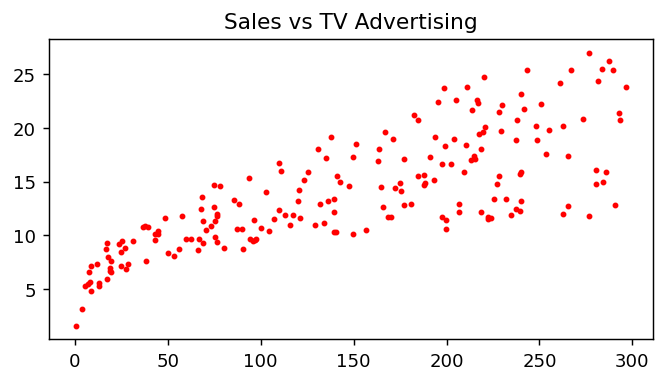

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/Advertising.csv')

Advertising = pd.DataFrame()
Advertising['Sales'] = df['sales']
Advertising['TV'] = df['TV']
Advertising

plt.figure(figsize=(6, 3) , dpi = 130)
plt.title('Sales vs TV Advertising')
plt.scatter(Advertising['TV'], Advertising['Sales'] , color = 'red' , alpha = 1 , s =  5)

In [39]:
import statsmodels.api as sm
X = Advertising[['TV']]                  # DataFrame 2D
y = Advertising['Sales']   

X_const = sm.add_constant(X)    # cria coluna "const" com valor 1
model = sm.OLS(y, X_const).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 04 May 2025   Prob (F-statistic):           1.47e-42
Time:                        15:04:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

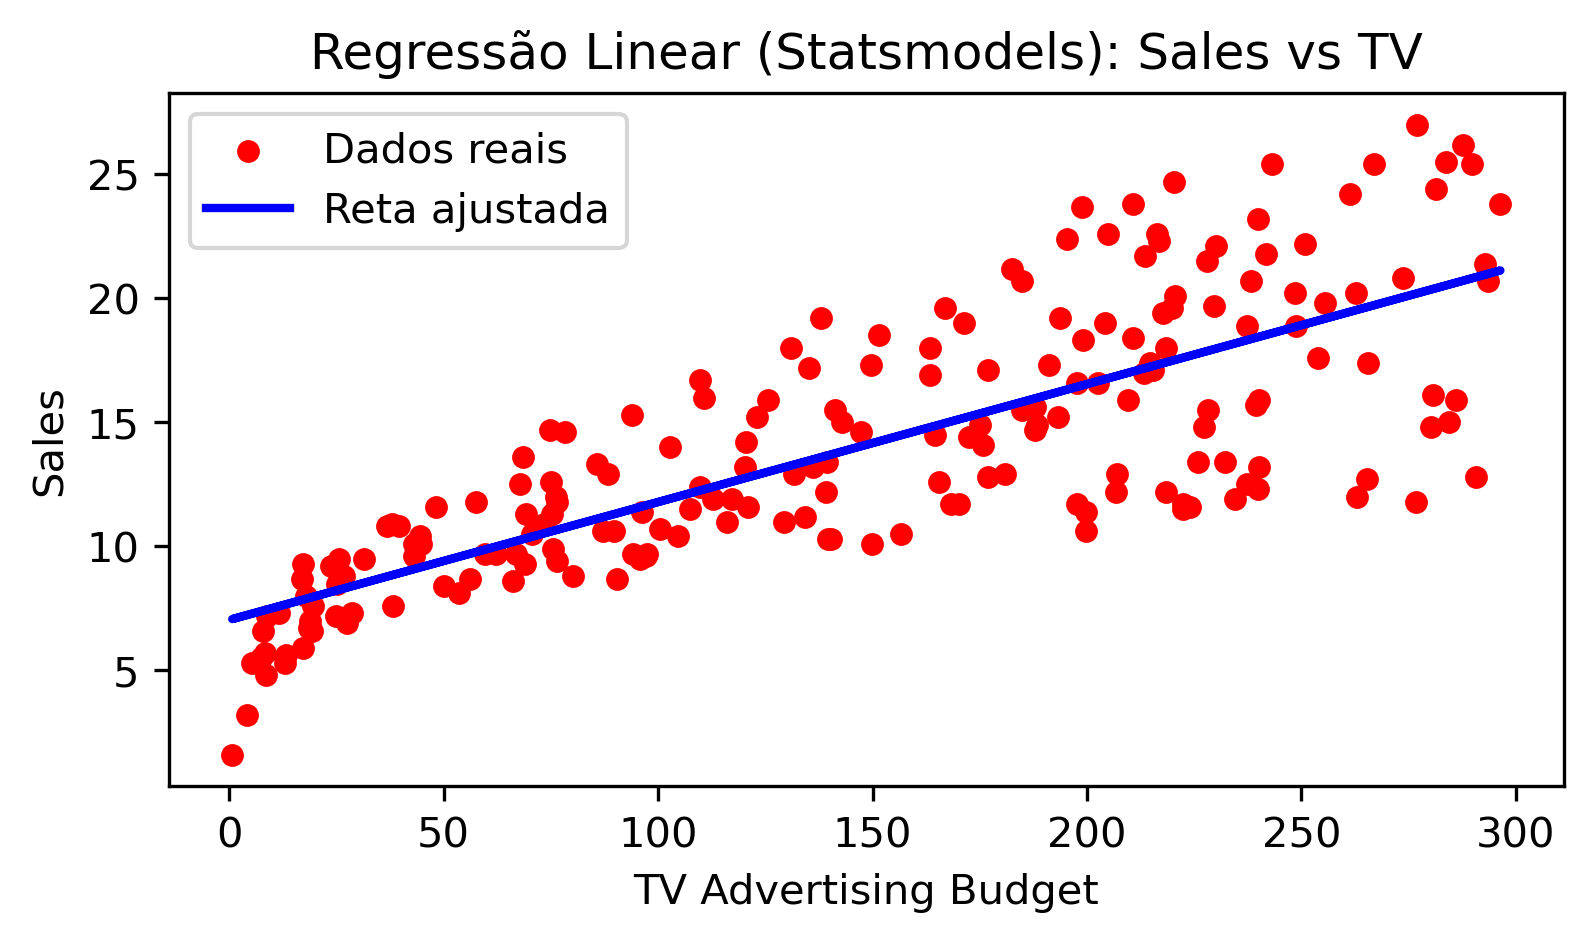

In [46]:
plt.figure(figsize=(6, 3), dpi=300)
plt.scatter(X, y, color='red', s=20, label='Dados reais')
plt.plot(X, model.predict(X_const), color='blue', linewidth=2, label='Reta ajustada')
plt.title('Regressão Linear (Statsmodels): Sales vs TV')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()